In [10]:
import pandas as pd

In [11]:
data=pd.read_csv('preprocessed_train_data.csv')

In [12]:
data

,PID,Text data,Label
0,train_pid_1,waiting mind breakdown new year feeling isnt a...,moderate
1,train_pid_2,new years resolution im gon na get ass therapi...,moderate
2,train_pid_3,new year somone else feeling like 2020 last ye...,moderate
3,train_pid_4,story guess hi im germany english mostly self ...,moderate
4,train_pid_5,sat dark cried going new year great start 2020,moderate
...,...,...,...
11029,train_pid_5033,never want rely anyone lowkey always probably,not depression
11030,train_pid_5051,anyone else feel like every single week dumb s...,not depression
11031,train_pid_1722,well well im done cant believe im saying ive f...,not depression
11032,train_pid_5373,thinking maxing two credit cards buy gaming la...,not depression


In [13]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
x = data['Text data']
y = data['Label']
x = np.array(data.iloc[:,0].values)
y = np.array(data['Label'].values)
cv = CountVectorizer()
x = cv.fit_transform(data['Text data']).toarray()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
oneVsRestrf = OneVsRestClassifier(rf)

In [18]:
oneVsRestrf.fit(x_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                     random_state=0))

In [19]:
y_pred = oneVsRestrf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test,y_pred))

In [20]:
cm=confusion_matrix(y_test,y_pred, labels=oneVsRestrf.classes_)

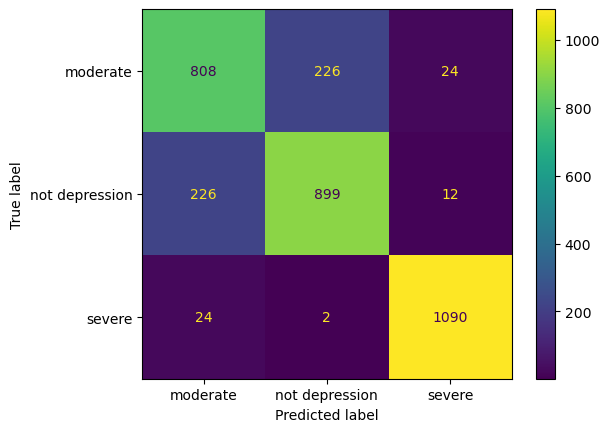

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=oneVsRestrf.classes_)
disp.plot()
plt.show()

In [23]:
data=pd.read_csv('preprocessed_dev_data.csv')
data

,Pid,text data,Class labels
0,dev_pid_1,im scared lie every day say ill make think mig...,moderate
1,dev_pid_2,new wanted vent finally realized im kind bad m...,moderate
2,dev_pid_3,im sad kinda always issue wouldnt say bad peer...,moderate
3,dev_pid_4,lonely alone immediately family members dead d...,moderate
4,dev_pid_5,year trash dont know im posting dont even know...,moderate
...,...,...,...
6502,dev_pid_2514,anyone feared theyll kill loved ones sleep uni...,not depression
6503,dev_pid_2829,finally got fulltime job feel even worse maybe...,not depression
6504,dev_pid_2260,deal boredomnothing satisfying anymore days ta...,not depression
6505,dev_pid_2653,got bed showered morning removed,not depression


In [24]:
x = data['text data']
y = data['Class labels']
x = np.array(data.iloc[:,0].values)
y = np.array(data['Class labels'].values)
x = cv.fit_transform(data['text data']).toarray()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)

In [26]:
oneVsRestrf.fit(x_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                     random_state=0))

In [27]:
y_pred = oneVsRestrf.predict(x_test)

In [ ]:
print("Classification Report")
print(classification_report(y_test,y_pred))

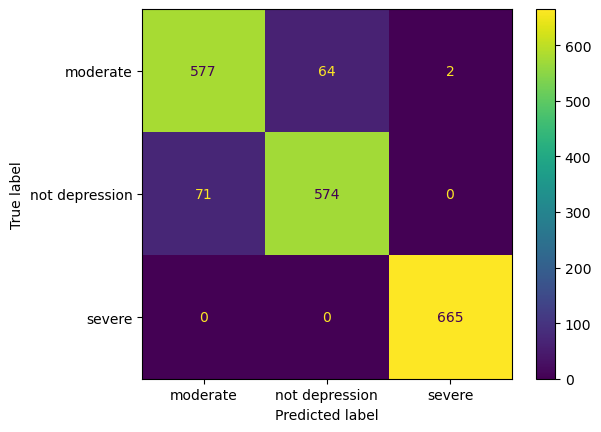

In [28]:
cm=confusion_matrix(y_test,y_pred, labels=oneVsRestrf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=oneVsRestrf.classes_)
disp.plot()
plt.show()

In [ ]:
input_text = 'This is me. Don鈥檛 get me wrong, it鈥檚 better than don鈥檛-leave-my-bed-for-a-week depression. I am grateful I can be an independent person. But there is something uniquely horrible about being able to go to work every day, occasionally clean up after yourself, pay your bills, generally put yourself together enough to look like a human being... but that鈥檚 it. Nothing else. No social life. No hobbies. Constantly battling your mind. And being absolutely fucking exhausted all the time.'
preprocessed_text = cv.transform([input_text]).toarray()
prediction = oneVsRestrf.predict(preprocessed_text)
print(prediction)

In [ ]:
data = pd.read_excel('test_data.xlsx')
data

In [ ]:
data['Text data'] = data['Text data'].fillna('')

In [18]:
pid = data['Pid']
text_data = data['Text data']

In [19]:
preprocessed_text = cv.transform(text_data).toarray()

In [20]:
predictions = oneVsRestrf.predict(preprocessed_text)

In [21]:
result_df = pd.DataFrame({'pid': pid, 'class_label': predictions})

In [22]:
result_df.to_csv('output.tsv', sep='\t', index=False)

In [23]:
data = pd.read_csv('output.tsv', sep='\t')
data

,Pid,Text data,Prediction Output
0,test_id_1,"This is me. Don鈥檛 get me wrong, it鈥檚 better th...",moderate
1,test_id_2,I hate that people don鈥檛 understand that i don...,moderate
2,test_id_3,"But here I am, 24 years old man and doing exac...",not depression
3,test_id_4,I鈥檓 trapped inside. Does anyone else get that ...,not depression
4,test_id_5,I read a lot of posts on here of people strugg...,moderate
...,...,...,...
494,test_id_495,I'm 14\nmy mom doesn't take my mental health s...,moderate
495,test_id_496,I was quite shocked at their reactions. I sort...,moderate
496,test_id_497,Lying on my bed..... fantasising another life ...,moderate
497,test_id_498,"I was bullied in elementary school, and I alwa...",moderate


In [24]:
data['Prediction Output'].unique()

array(['moderate', 'not depression', 'severe'], dtype=object)

In [25]:
data['Prediction Output'].value_counts()

moderate          401
not depression     97
severe              1
Name: Prediction Output, dtype: int64